In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
data = data.drop('Id', axis=1)

In [ ]:
# features = data.drop('SalePrice', axis=1)
# target = data['SalePrice']

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# train = pd.concat([X_train, y_train], axis=1)
# test = pd.concat([X_test, y_test], axis=1)

In [ ]:
# data = train

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
def plot_hist(data,ax=0):
  sns.histplot(data, kde=True)
  plt.show()

def plot_join(feature,target,ax=0):
  sns.jointplot(x=feature,
                y=target,
                height=3,
                color='darkgreen',
                joint_kws={'alpha':0.5})
  plt.show()

In [ ]:
def plot_outliers(df, feat):

    trace0 = go.Box(
        y = df[feat],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(32,178,170)'),
        line = dict(
            color = 'rgb(32,178,170)')
    )

    trace1 = go.Box(
        y = df[feat],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(0,128,128)'),
        line = dict(
            color = 'rgb(0,128,128)')
    )

    trace2 = go.Box(
        y = df[feat],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(0,250,154)',
            outliercolor = '#FF69B4',
            line = dict(
                outliercolor = '#FF69B4',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(0,250,154)')
    )

    trace3 = go.Box(
        y = df[feat],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(47,79,79)'),
        line = dict(
            color = 'rgb(47,79,79)')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(feat)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig)

def removeOutliers(df_out, col, drop=False):
    Q1 = df_out[col].quantile(0.25)
    Q3 = df_out[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_out[(df_out[col] < lower_bound) | (df_out[col] > upper_bound)]

    print(f"Jumlah outlier terdeteksi (termasuk duplikat) untuk column {col} {len(outliers)}")

    if drop:
        # Remove outliers
        data_clean = data[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
        print ("Jumlah data set baru setelah trim outliner dengan {} samples dan {} setiap feature.".format(*data_clean.shape))
        return data_clean
    else:
        print ("Tanpa Perubahan, df.shape = ",df_out.shape)
        return df_out

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
object_data = data.select_dtypes(include='object')

In [ ]:
print(len(object_data.columns))

43


In [ ]:
for col in object_data.columns:
  data.fillna('None', inplace=True)
  print("\n-----------------------------------")
  print(f'{col}: {data[col].unique()}')
  print("-----------------------------------\n")
  print(data[col].value_counts())


-----------------------------------
MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
-----------------------------------

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

-----------------------------------
Street: ['Pave' 'Grvl']
-----------------------------------

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

-----------------------------------
Alley: ['None' 'Grvl' 'Pave']
-----------------------------------

Alley
None    1369
Grvl      50
Pave      41
Name: count, dtype: int64

-----------------------------------
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
-----------------------------------

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

-----------------------------------
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
-----------------------------------

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

-----------------------------------
Utilities: [

<ipython-input-52-158bb4004d4c>:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.




-----------------------------------
BsmtQual: ['Gd' 'TA' 'Ex' 'None' 'Fa']
-----------------------------------

BsmtQual
TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: count, dtype: int64

-----------------------------------
BsmtCond: ['TA' 'Gd' 'None' 'Fa' 'Po']
-----------------------------------

BsmtCond
TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: count, dtype: int64

-----------------------------------
BsmtExposure: ['No' 'Gd' 'Mn' 'Av' 'None']
-----------------------------------

BsmtExposure
No      953
Av      221
Gd      134
Mn      114
None     38
Name: count, dtype: int64

-----------------------------------
BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']
-----------------------------------

BsmtFinType1
Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: count, dtype: int64

-----------------------------------
BsmtFinType2: ['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ']
-----------

In [ ]:
numeric_data = data.select_dtypes(include='number')

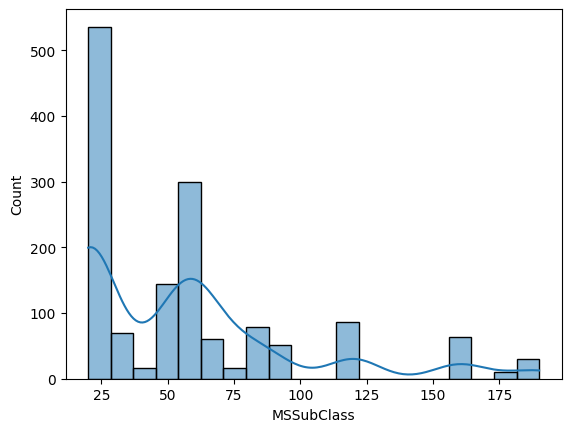

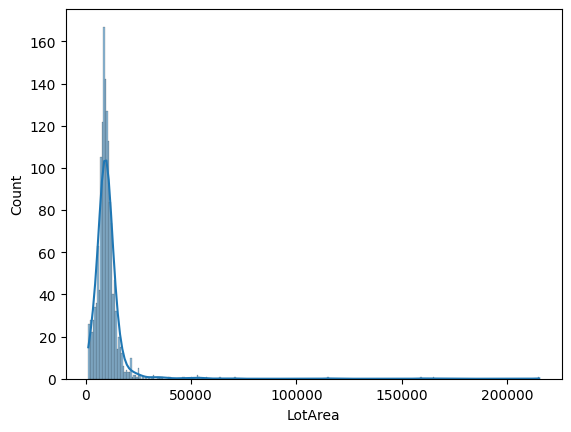

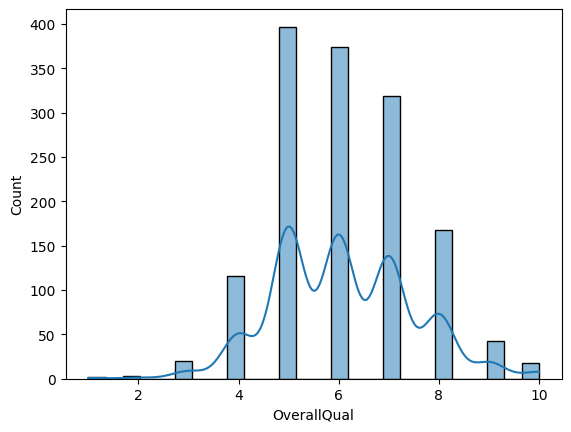

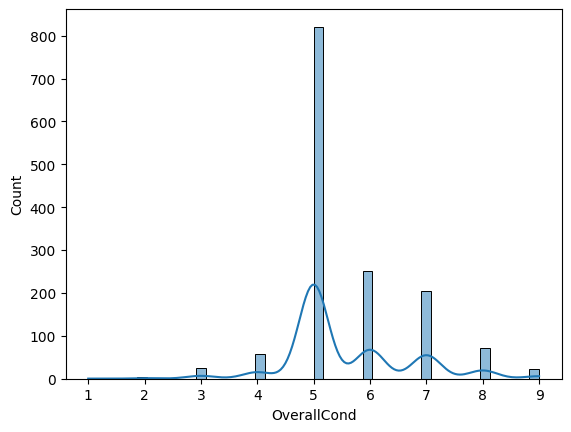

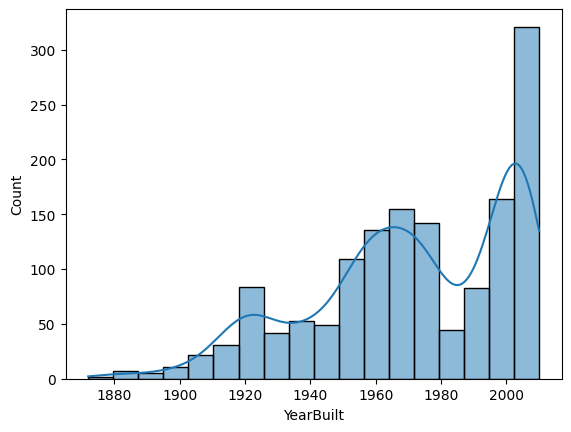

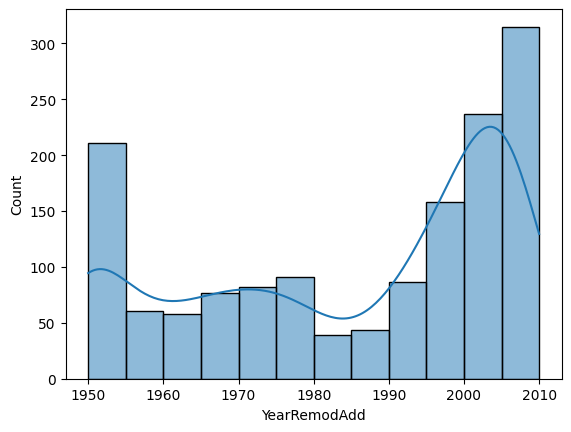

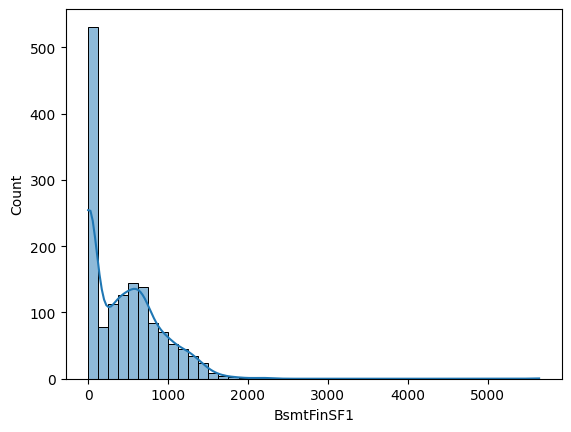

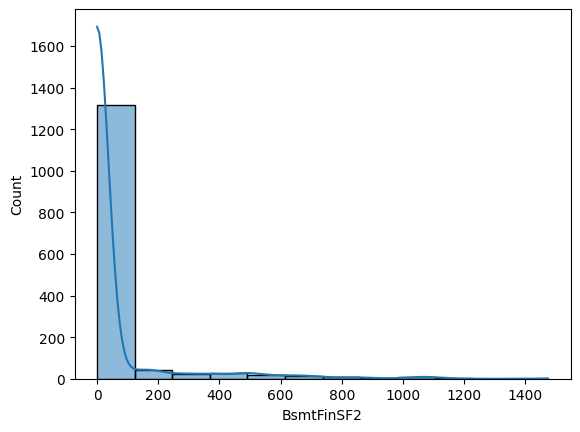

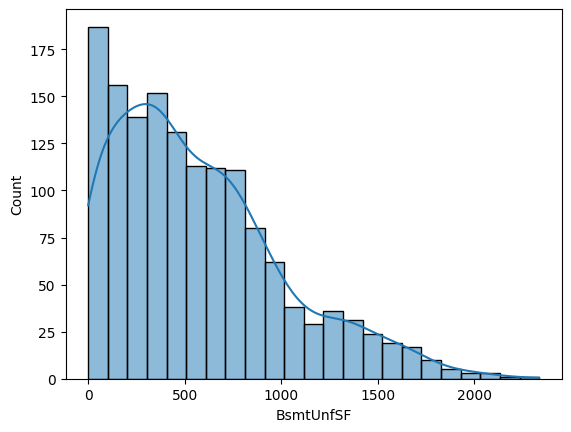

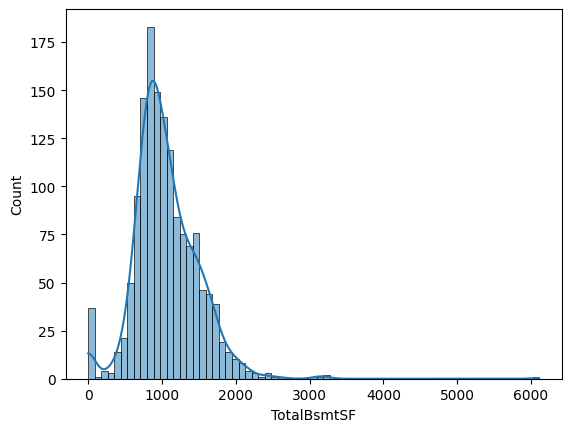

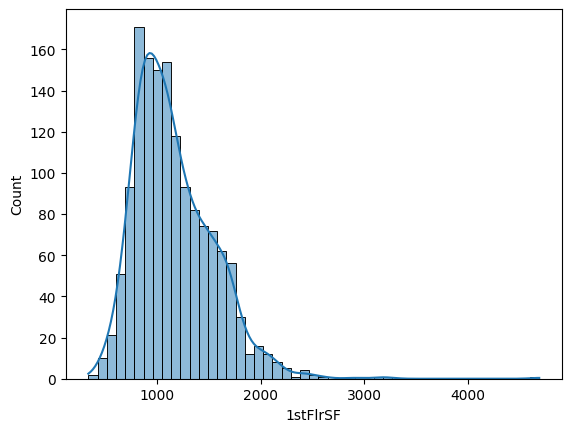

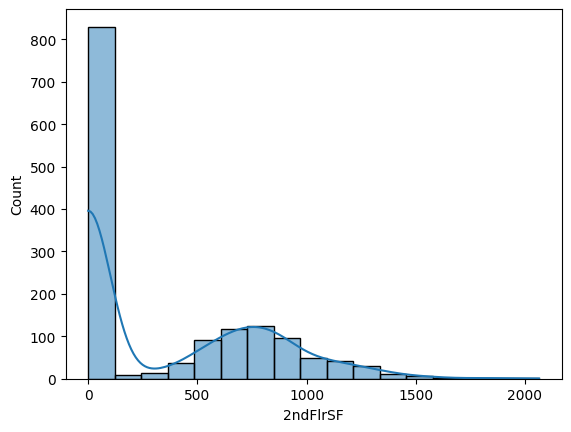

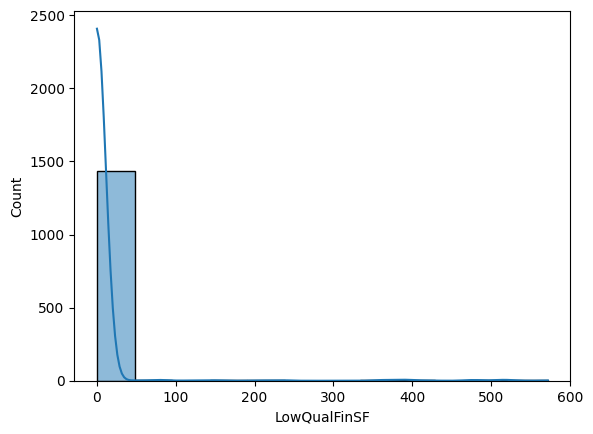

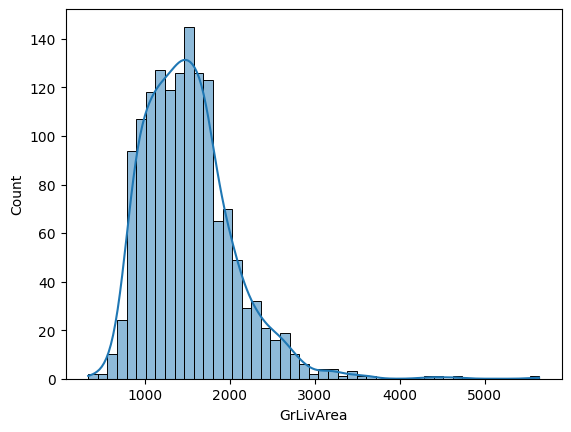

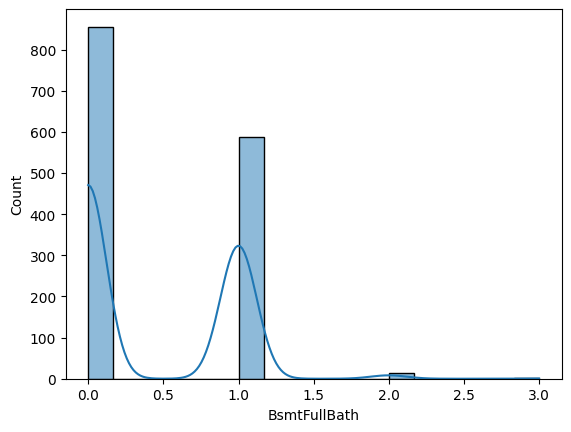

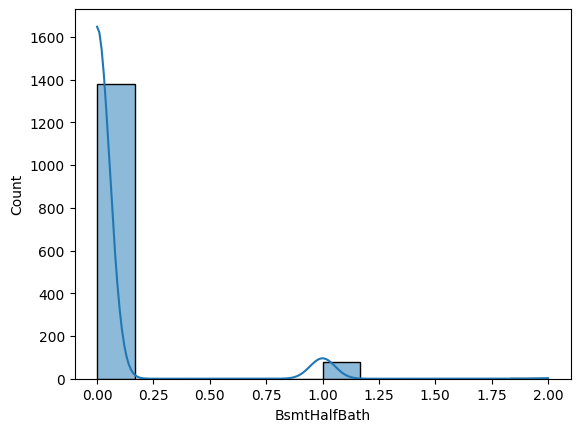

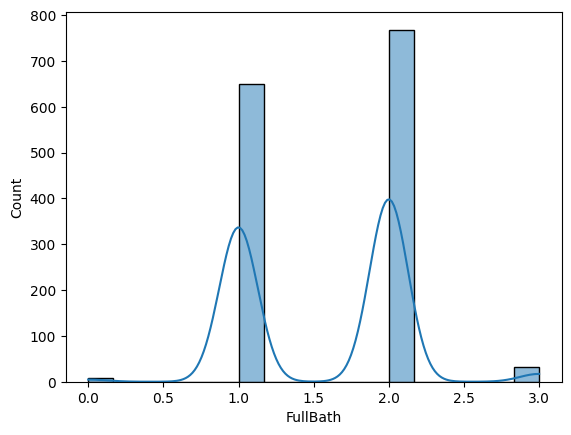

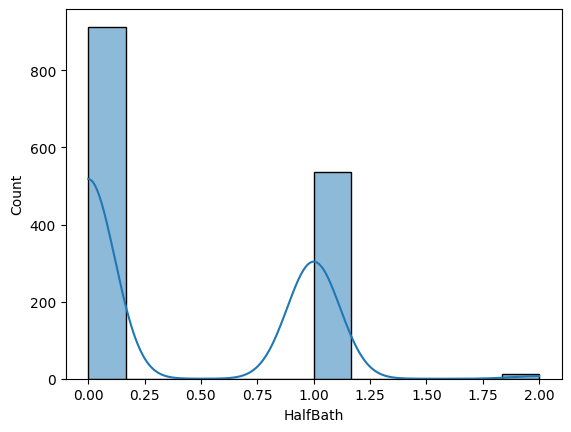

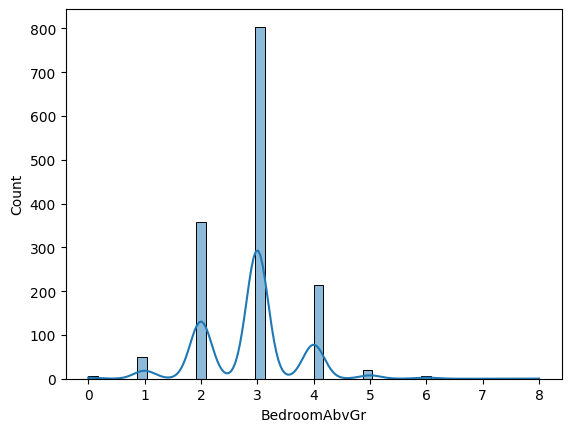

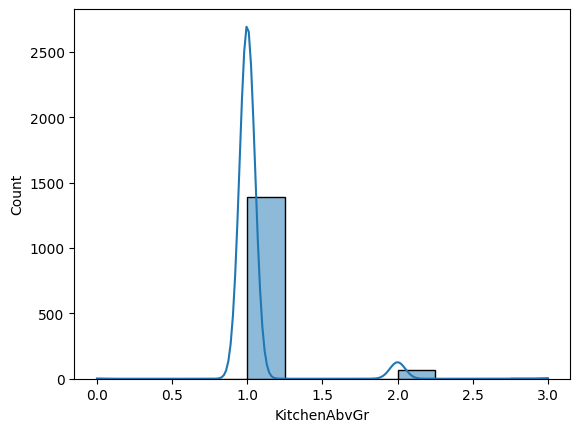

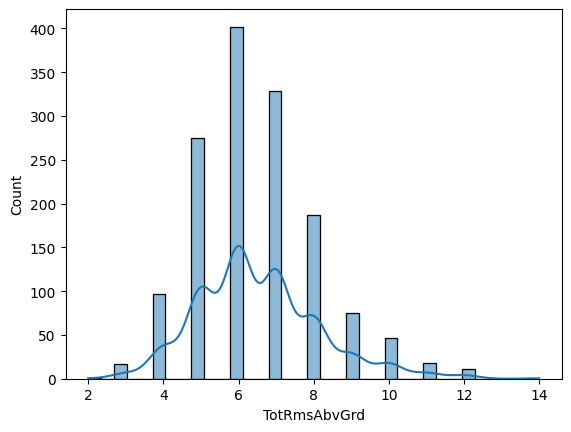

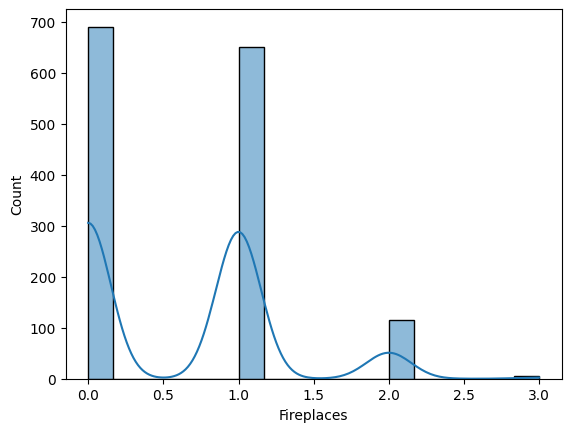

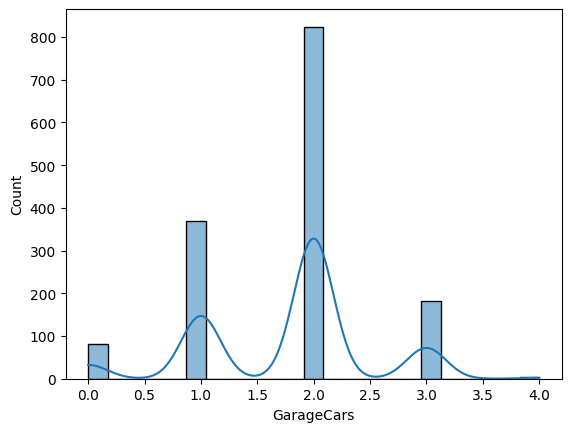

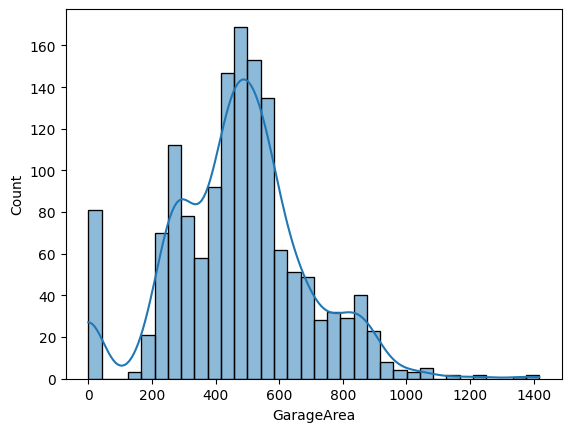

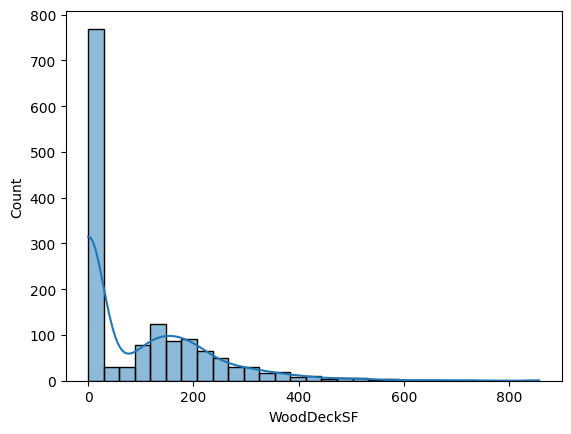

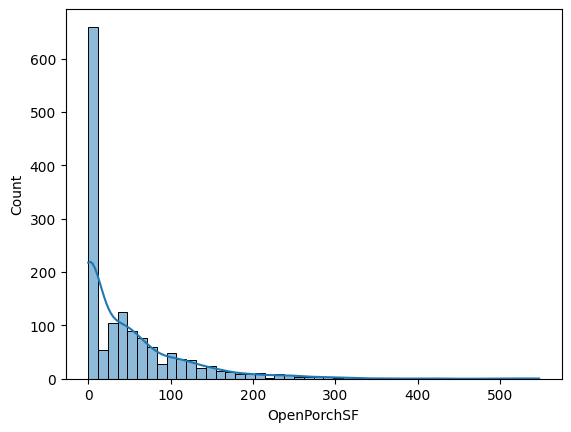

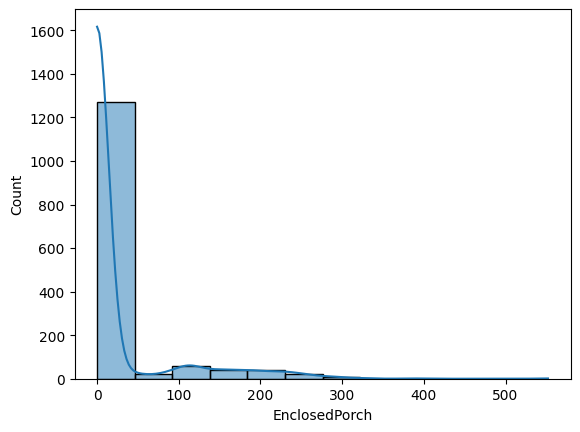

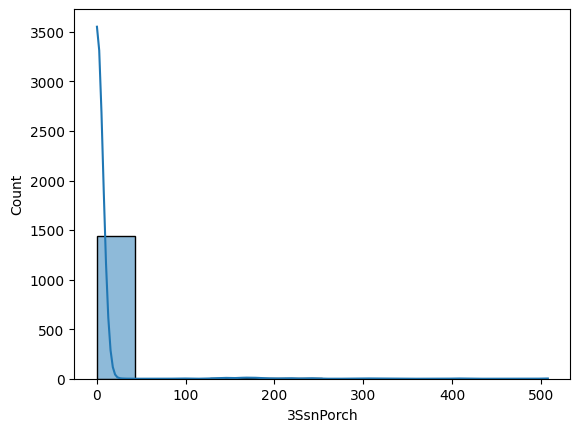

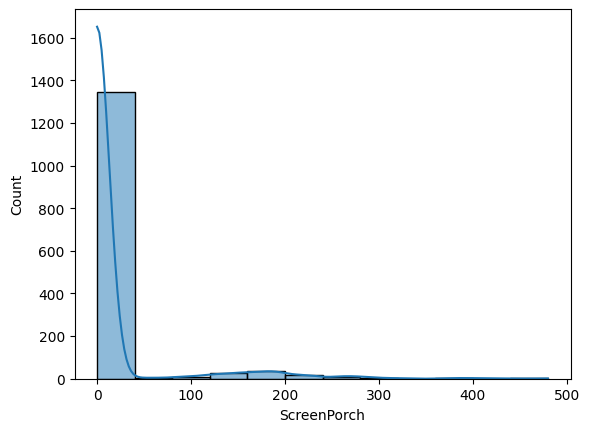

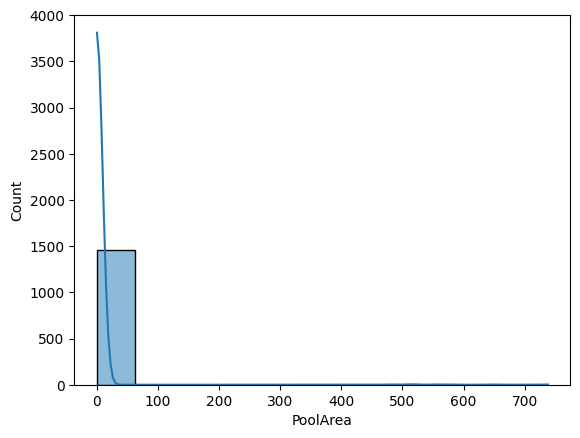

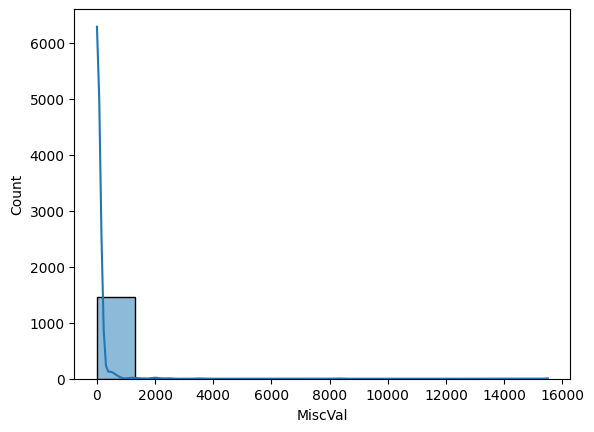

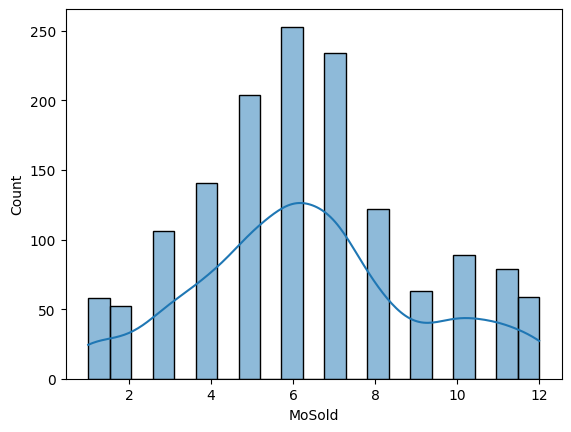

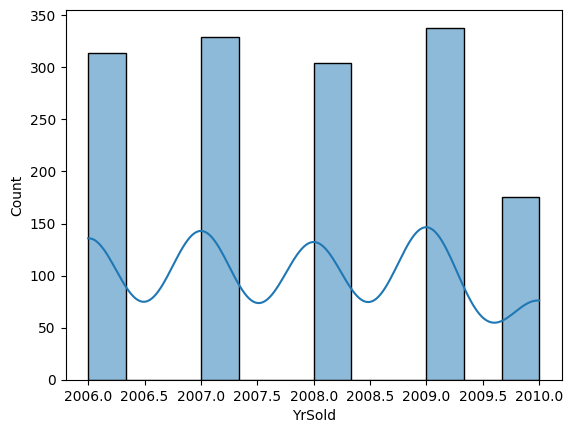

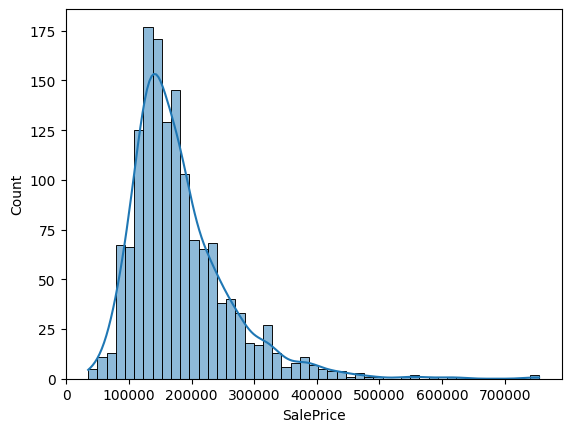

In [ ]:
for col in numeric_data.columns:
  plot_hist(numeric_data[col])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   Alley          1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

In [ ]:
def handle_target_distribution():
  data["SalePrice"] = np.log(data["SalePrice"])
  plot_hist(data["SalePrice"])

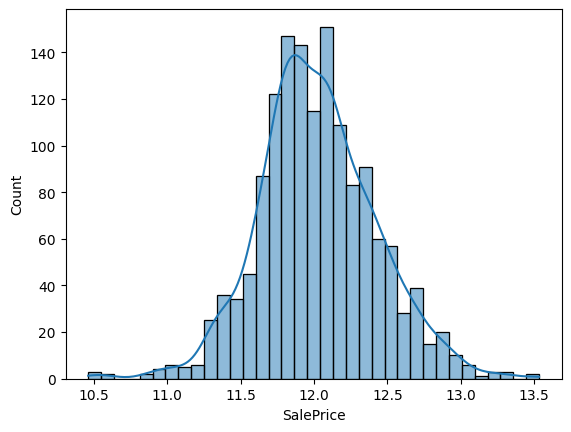

In [ ]:
handle_target_distribution()

In [ ]:
def winsorize_this(col_data,q1,q2):
  lower_limit = col_data.quantile(q1)
  upper_limit = col_data.quantile(q2)
  winsorized_data = col_data.clip(lower=lower_limit, upper=upper_limit)
  return winsorized_data

In [ ]:
for col in numeric_data.columns:
  print("\n-----------------------------------")
  removeOutliers(data, col, drop=False)
  print("-----------------------------------\n")
  plot_outliers(data, col)


-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column MSSubClass 103
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column LotArea 69
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column OverallQual 2
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column OverallCond 125
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column YearBuilt 7
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column YearRemodAdd 0
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column BsmtFinSF1 7
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column BsmtFinSF2 167
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column BsmtUnfSF 29
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column TotalBsmtSF 61
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column 1stFlrSF 20
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column 2ndFlrSF 2
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column LowQualFinSF 26
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column GrLivArea 31
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column BsmtFullBath 1
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column BsmtHalfBath 82
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column FullBath 0
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column HalfBath 0
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column BedroomAbvGr 35
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column KitchenAbvGr 68
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column TotRmsAbvGrd 30
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column Fireplaces 5
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column GarageCars 5
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column GarageArea 21
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column WoodDeckSF 32
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column OpenPorchSF 77
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column EnclosedPorch 208
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column 3SsnPorch 24
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column ScreenPorch 116
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column PoolArea 7
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column MiscVal 52
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column MoSold 0
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column YrSold 0
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------




-----------------------------------
Jumlah outlier terdeteksi (termasuk duplikat) untuk column SalePrice 28
Tanpa Perubahan, df.shape =  (1460, 80)
-----------------------------------



In [ ]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
high_corr_features = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageArea','SalePrice']
all_category_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature','SaleType', 'SaleCondition']

selected_columns = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','SalePrice','MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature','SaleType', 'SaleCondition']

In [ ]:
def handling_data():
  data['TotalBsmtSF'] = data['TotalBsmtSF'].replace(0, data['TotalBsmtSF'].median())
  data['TotalBsmtSF'] = np.log1p(data["TotalBsmtSF"])

  data['1stFlrSF'] = np.log1p(data["1stFlrSF"])

  data['GrLivArea'] = np.log1p(data["GrLivArea"])

  data['GarageArea'] = winsorize_this(data['GarageArea'],0,0.95)
  data['GarageArea'] = data['GarageArea'].replace(0, data['GarageArea'].median())

In [ ]:
handling_data()

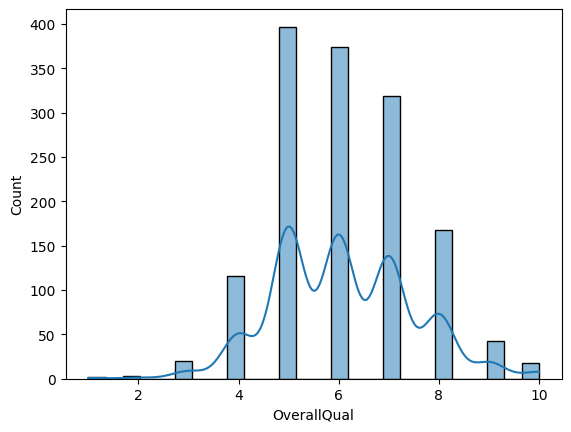

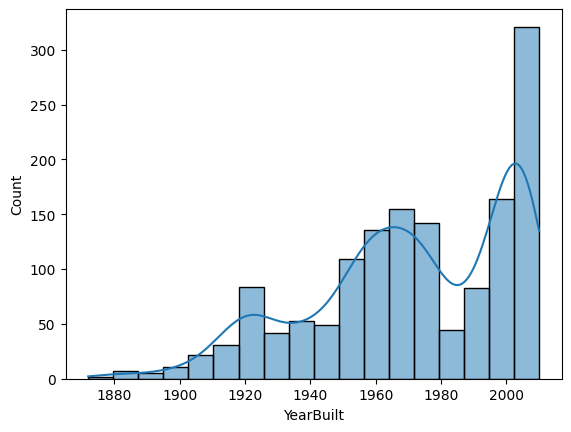

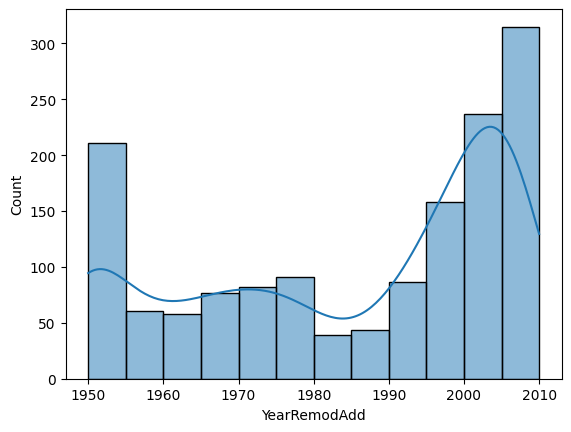

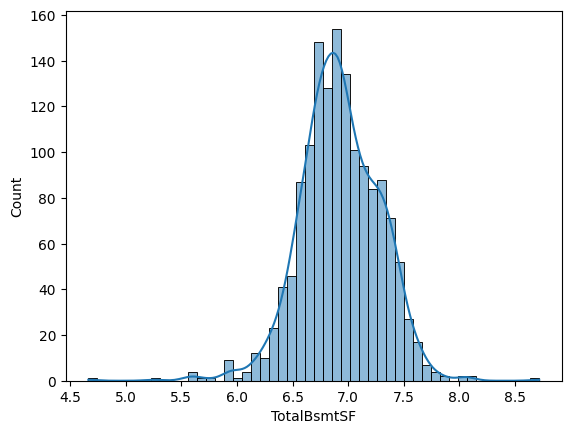

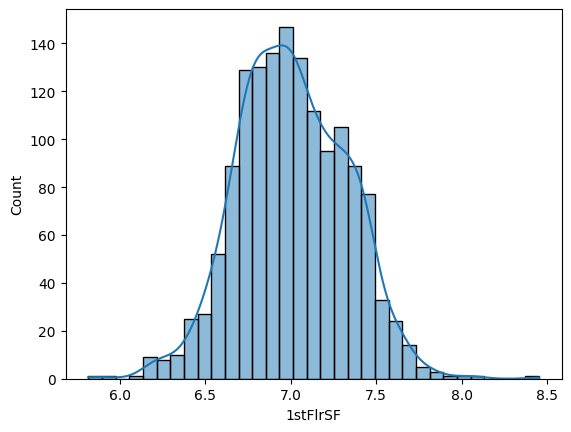

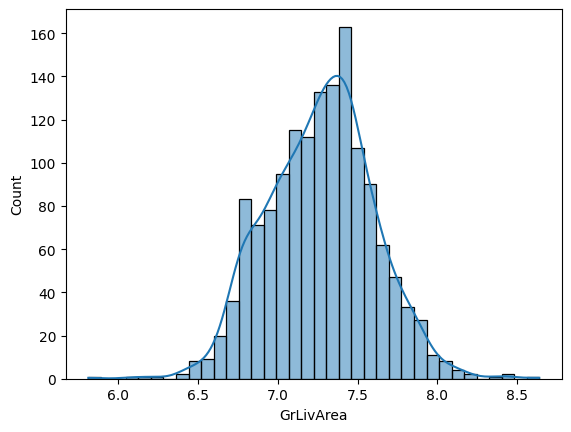

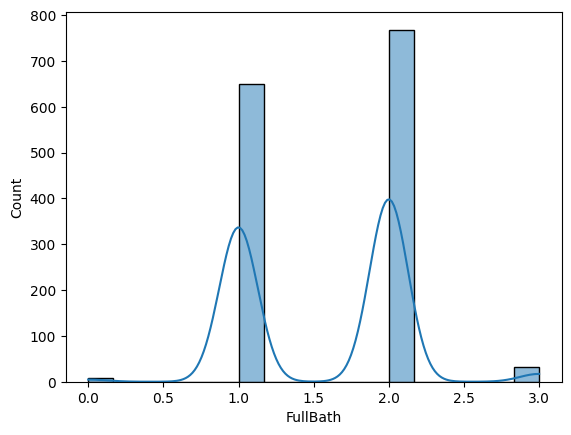

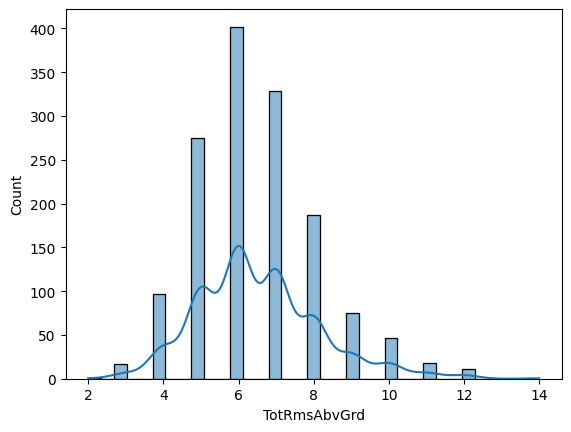

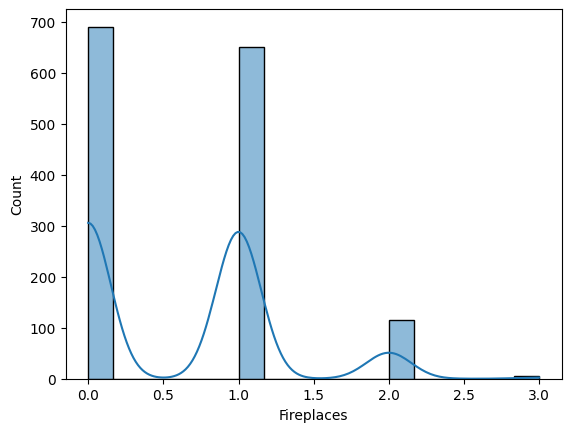

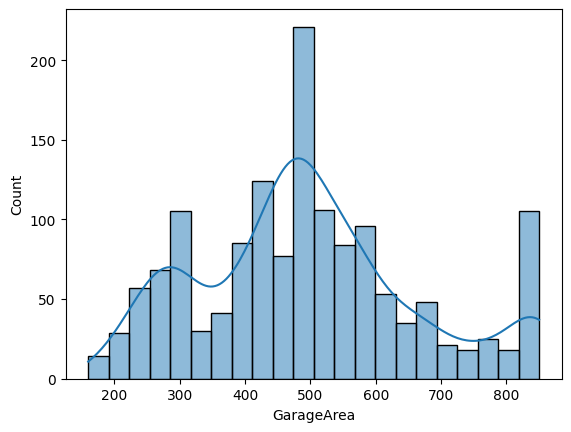

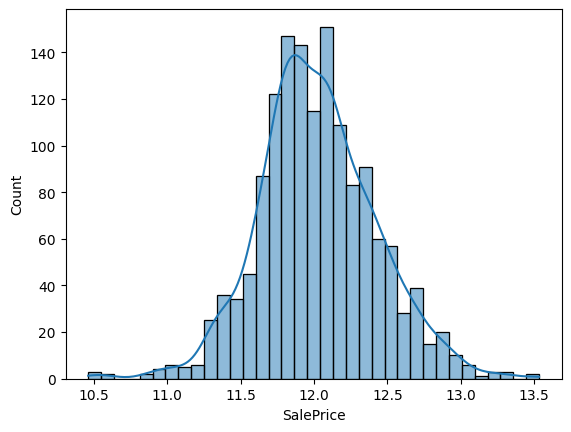

In [ ]:
for col in high_corr_features:
  plot_hist(data[col])

In [ ]:
data = pd.get_dummies(data[selected_columns])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler()
scaler = StandardScaler()

data_train = scaler.fit_transform(data.drop('SalePrice', axis=1))
data_train = r_scaler.fit_transform(data_train)

In [ ]:
data_train = pd.DataFrame(data_train, columns=data.columns[:-1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_train, data['SalePrice'], test_size=0.2, random_state=42)

In [ ]:
def evaluate_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    r2_train    = r2_score(np.expm1(y_train), np.expm1(y_train_pred))
    mse_train   = mean_squared_error(np.expm1(y_train), np.expm1(y_train_pred))
    rmse_train  = np.sqrt(mse_train)

    r2_test     = r2_score(np.expm1(y_test), np.expm1(y_pred))
    mse_test    = mean_squared_error(np.expm1(y_test),np.expm1(y_pred))
    rmse_test   = np.sqrt(mse_test)

    cv          = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    print("-------------- Train Evaluation ----------")
    print(f'R2 Train: {r2_train}')
    print(f'MSE Train: {mse_train}')
    print(f'RMSE Train: {rmse_train}')

    print("-------------- Test Evaluation ----------")
    print(f'MSE: {mse_test}')
    print(f'RMSE: {rmse_test}')
    print(f'R2 Test: {r2_test}')

    print("-------------- CV Evaluation ----------")
    print(f'CV: {cv.mean()}')

    plt.scatter(np.expm1(y_test), np.expm1(y_pred))
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()

    return r2_train, mse_train, rmse_train, mse_test, rmse_test, r2_test, cv.mean()

In [ ]:
def lasso_model():
  model = Lasso(alpha=0.00155, fit_intercept=True, max_iter=3000)
  model.fit(X_train, y_train)

  evaluate_model(model)

In [ ]:
def random_forest_model():
  model = RandomForestRegressor(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)

  evaluate_model(model)

In [ ]:
def xgboost_model():
  model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
  model.fit(X_train, y_train)

  evaluate_model(model)

In [ ]:
def lightgbm_model():
  model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
  model.fit(X_train, y_train)

  evaluate_model(model)

-------------- Train Evaluation ----------
R2 Train: 0.933622603571775
MSE Train: 395911325.0741465
RMSE Train: 19897.52057604531
-------------- Test Evaluation ----------
MSE: 606394903.6310991
RMSE: 24625.086875605113
R2 Test: 0.9209427490759252
-------------- CV Evaluation ----------
CV: 0.8699098628391896


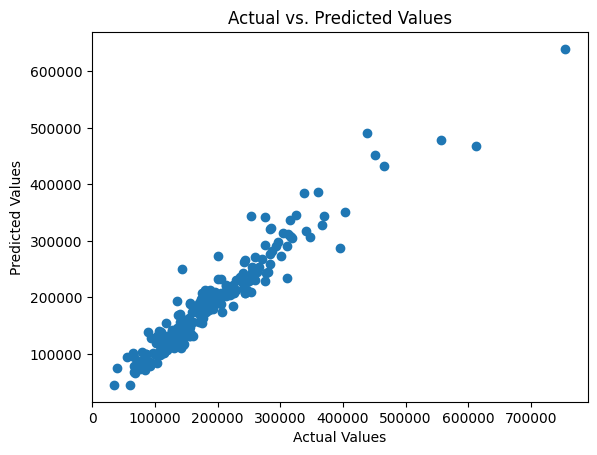

In [ ]:
lasso_model()

-------------- Train Evaluation ----------
R2 Train: 0.9781830950688026
MSE Train: 130128028.59279022
RMSE Train: 11407.36729455093
-------------- Test Evaluation ----------
MSE: 855657513.8696712
RMSE: 29251.624123622114
R2 Test: 0.8884457465357969
-------------- CV Evaluation ----------
CV: 0.8455368844516986


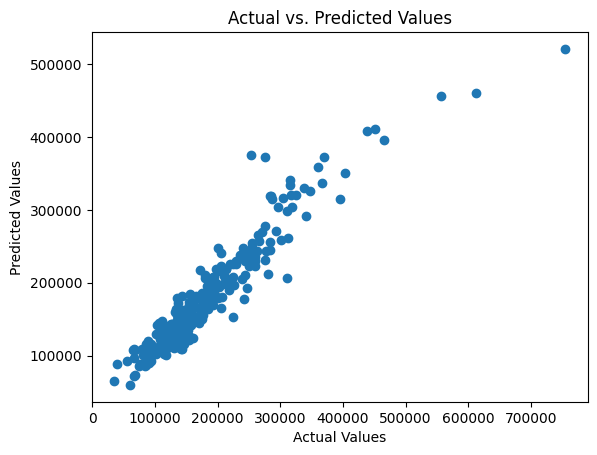

In [ ]:
random_forest_model()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001006 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1517
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 169
[LightGBM] [Info] Start training from score 12.030652
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1509
[LightGBM] [Info] Number of data points in the train set: 1051, number of used features: 164
[LightGBM] [Info] Start training from score 12.031988
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM]

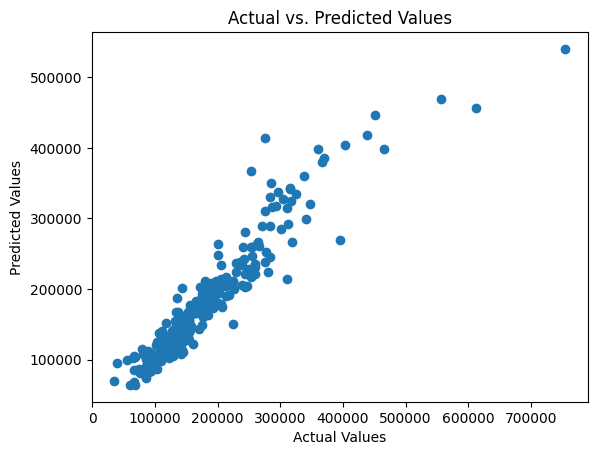

In [ ]:
lightgbm_model()

-------------- Train Evaluation ----------
R2 Train: 0.9911471685471372
MSE Train: 52803159.20421675
RMSE Train: 7266.578232167926
-------------- Test Evaluation ----------
MSE: 789510689.9364439
RMSE: 28098.232861453118
R2 Test: 0.897069476758802
-------------- CV Evaluation ----------
CV: 0.864729131416038


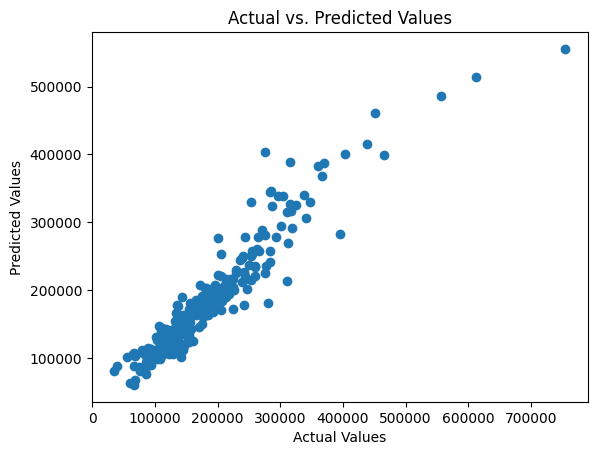

In [ ]:
xgboost_model()